In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pydot
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree

In [2]:
#importing the data file and displaying the data types
df = pd.read_csv('D3.csv')

df[['Location', 'WindGustDir', 'WindDir9am', 
    'WindDir3pm', 'Cloud9am', 'Cloud3pm']] = df[['Location', 'WindGustDir', 'WindDir9am', 
                                                 'WindDir3pm', 'Cloud9am', 'Cloud3pm']].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Data columns (total 23 columns):
Year             142219 non-null int64
Month            142219 non-null int64
Location         142219 non-null object
MinTemp          142219 non-null float64
MaxTemp          142219 non-null float64
Rainfall         142219 non-null float64
Evaporation      142219 non-null float64
Sunshine         142219 non-null float64
WindGustDir      142219 non-null object
WindGustSpeed    142219 non-null int64
WindDir9am       142219 non-null object
WindDir3pm       142219 non-null object
WindSpeed9am     142219 non-null int64
WindSpeed3pm     142219 non-null int64
Humidity9am      142219 non-null float64
Humidity3pm      142219 non-null float64
Pressure9am      142219 non-null float64
Pressure3pm      142219 non-null float64
Cloud9am         142219 non-null object
Cloud3pm         142219 non-null object
Temp9am          142219 non-null float64
Temp3pm          142219 non-null float64
Rai

In [3]:
# drop Year
df.drop(['Year', 'Location', 'Month'], axis=1, inplace=True)

In [4]:
# one-hot encoding
df = pd.get_dummies(df)

In [5]:
# target/input split
y = df['RainTomorrow']
#X = df[['Humidity3pm', 'Pressure3pm', 'Rainfall', 'WindGustSpeed']]
X = df.drop(['RainTomorrow'], axis=1)

In [6]:
#convert X from pandas Dataframe to numpy matrix for sklearn
X_mat = X.to_numpy()

In [7]:
# setting random state
rs = 10
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [8]:
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [9]:
# accuracy of the model
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.9999799101985877
Test accuracy: 0.7875123048797638


In [10]:
# classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     33101
           1       0.53      0.54      0.53      9565

    accuracy                           0.79     42666
   macro avg       0.70      0.70      0.70     42666
weighted avg       0.79      0.79      0.79     42666



In [11]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Humidity3pm : 0.2573062806776805
Pressure3pm : 0.0680068000662357
Rainfall : 0.05998860788901846
WindGustSpeed : 0.05756123085908559
Sunshine : 0.049312258359824036
MinTemp : 0.044451352639929255
Humidity9am : 0.042901550920543825
Pressure9am : 0.04011072656244531
MaxTemp : 0.03920341800435303
Temp3pm : 0.03809305373346328
Temp9am : 0.03790919972010213
WindSpeed3pm : 0.02903674742995449
WindSpeed9am : 0.027513313931066482
Evaporation : 0.02664175908975975
WindDir9am_N : 0.004925648269726562
Cloud9am_7 : 0.004843236742379715
WindDir3pm_N : 0.00445803829527041
Cloud3pm_7 : 0.004306034631849159
WindDir9am_W : 0.004188400285429368
Cloud3pm_8 : 0.004093791804508012


In [14]:
#default with no set parameters

model_small = DecisionTreeClassifier(random_state=rs)
model_small.fit(X_train, y_train)
n_nodes = model_small.tree_.node_count
is_leaves = np.zeros(shape=n_nodes, dtype=bool)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

y_pred = model_small.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9999799101985877
Test accuracy: 0.7875123048797638
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     33101
           1       0.53      0.54      0.53      9565

    accuracy                           0.79     42666
   macro avg       0.70      0.70      0.70     42666
weighted avg       0.79      0.79      0.79     42666



In [15]:
print("Nodes:", n_nodes)
print("Leaves:", model_small.get_n_leaves())

Nodes: 23205
Leaves: 11603


In [16]:
model.tree_.__getstate__()

Leaves: 11603


{'max_depth': 40,
 'node_count': 23205,
 'nodes': array([( 1, 17764,  9, 71.5       , 0.34786005, 99553, 9.9553e+04),
        ( 2, 12755,  2,  1.05000001, 0.25068335, 83196, 8.3196e+04),
        ( 3,  3212,  4,  7.35000014, 0.1972374 , 68336, 6.8336e+04), ...,
        (-1,    -1, -2, -2.        , 0.        ,     2, 2.0000e+00),
        (-1,    -1, -2, -2.        , 0.        ,     1, 1.0000e+00),
        (-1,    -1, -2, -2.        , 0.        ,     3, 3.0000e+00)],
       dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]),
 'values': array([[[7.7234e+04, 2.2319e+04]],
 
        [[7.0972e+04, 1.2224e+04]],
 
        [[6.0756e+04, 7.5800e+03]],
 
        ...,
 
        [[2.0000e+00, 0.0000e+00]],
 
        [[0.0000e+00, 1.0000e+00]],
 
        [[3.0000e+00, 0.0000e+00]]])}

In [17]:
# more infomration
from inspect import getmembers
print( getmembers( model_small.tree_ ) )

[('__class__', <class 'sklearn.tree._tree.Tree'>), ('__delattr__', <method-wrapper '__delattr__' of sklearn.tree._tree.Tree object at 0x000001EA41FDAE68>), ('__dir__', <built-in method __dir__ of sklearn.tree._tree.Tree object at 0x000001EA41FDAE68>), ('__doc__', "Array-based representation of a binary decision tree.\n\n    The binary tree is represented as a number of parallel arrays. The i-th\n    element of each array holds information about the node `i`. Node 0 is the\n    tree's root. You can find a detailed description of all arrays in\n    `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split\n    nodes, resp. In this case the values of nodes of the other type are\n    arbitrary!\n\n    Attributes\n    ----------\n    node_count : int\n        The number of nodes (internal nodes + leaves) in the tree.\n\n    capacity : int\n        The current capacity (i.e., size) of the arrays, which is at least as\n        great as `node_count`.\n\n    max_depth : int\n  

In [18]:
from sklearn import tree
model_small = DecisionTreeClassifier(max_depth=1,random_state=rs)
model_small.fit(X_train, y_train)
tree.plot_tree(model_small,label='root')
print(model_small)

DecisionTreeClassifier(max_depth=1, random_state=10)


In [19]:
X.columns[9]

'Humidity3pm'

In [21]:
# grid search CV

from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_leaf': range(5, 45, 10)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.25111012, 0.22457283, 0.22583139, 0.41230993, 0.42380226,
       0.40837293, 0.58316457, 0.58218298, 0.56872852, 0.71830962,
       0.7569108 , 0.6950412 , 0.8470233 , 0.78414066, 0.80570188,
       0.93643341, 0.93748581, 0.93106616, 1.04274087, 1.04768093,
       1.08930321, 1.2707454 , 1.25066814, 1.21566641, 1.29929066,
       1.29008882, 1.32424514, 0.2043978 , 0.20502663, 0.20849743,
       0.37080009, 0.37095191, 0.42561607, 0.52730567, 0.52074301,
       0.55135169, 0.72429976, 0.71644874, 0.70785716, 0.82345407,
       0.83648238, 0.81456645, 0.9430424 , 0.93661726, 0.93344779,
       1.06535177, 1.09195242, 1.08900335, 1.216572  , 1.33343399,
       1.33075414, 1.45005102, 1.36947882, 1.3559597 ]), 'std_fit_time': array([0.02658346, 0.0104656 , 0.01155076, 0.02208958, 0.01735087,
       0.0299832 , 0.05149011, 0.03331424, 0.02723849, 0.02251664,
       0.02130503, 0.01789334, 0.04840155, 0.01003276, 0.02781369,
       0.03290545, 0.02703553, 0.02644

In [22]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  54


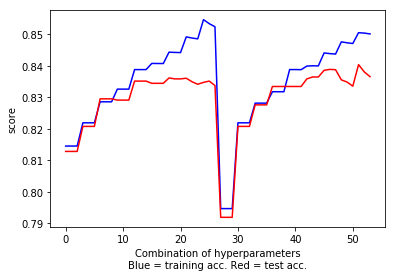

In [23]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

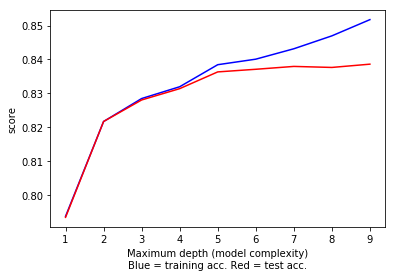

In [24]:
result_set['params']
dd = pd.DataFrame(result_set['params'])
index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [25]:
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10}


In [26]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.8543790744628489
Test accuracy: 0.8399428116064314


In [27]:
y_pred_dt = model.predict(X_test)
y_pred_dt_cv = cv_1.predict(X_test)

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.7875123048797638
Accuracy score on test for DT_optimal 0.8399428116064314


In [28]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.7036697247706422 	 0.2963302752293578 	 0
0.8578706957132818 	 0.1421293042867182 	 0
0.9285714285714286 	 0.07142857142857142 	 0
0.8578706957132818 	 0.1421293042867182 	 0
0.8101092896174863 	 0.18989071038251365 	 0
0.5662878787878788 	 0.4337121212121212 	 0
0.9900243591230715 	 0.00997564087692843 	 0
0.9555921052631579 	 0.044407894736842105 	 0
0.8578706957132818 	 0.1421293042867182 	 1
0.8135828135828136 	 0.1864171864171864 	 1
0.9900243591230715 	 0.00997564087692843 	 0
0.9900243591230715 	 0.00997564087692843 	 0
0.8578706957132818 	 0.1421293042867182 	 0
0.8578706957132818 	 0.1421293042867182 	 0
0.9506683640992998 	 0.049331635900700194 	 0
0.8578706957132818 	 0.1421293042867182 	 0
0.9623455579525397 	 0.03765444204746029 	 1
0.985186873290793 	 0.01

In [29]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.6994391810027233
ROC index on test for DT_optimal: 0.8509135996241951


In [30]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

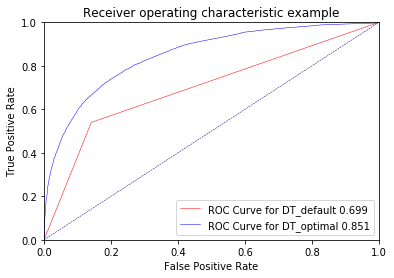

In [31]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
# lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [32]:
import pickle
dt_best = cv_1
with open('CS.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

In [33]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(dt_cv_best,feature_names=X.columns,filled=True,class_names=['Rain=False','Rain=True'], out_file=dotfile)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dt_viz.png") # saved in the following file - will return True if successful

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.424405 to fit



True